In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [22]:
#import data
data = pd.read_csv("KAG_conversion_data.csv",sep=",")

In [23]:
#data set have 11 columns and 1143 rows
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


#### 1) Find cost per acquisition for each ad campaign of XYZ company. Show descriptive statistics in term of numbers and graphs. Explain the results.

In [24]:
data.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [25]:
df1 = data[['xyz_campaign_id','Approved_Conversion','Spent']]
df1.head()

,xyz_campaign_id,Approved_Conversion,Spent
0,916,1,1.43
1,916,0,1.82
2,916,0,0.00
3,916,0,1.25
4,916,1,1.29


In [26]:
#ค่าเฉลี่ยในการจ่ายค่าโฆษณาแคมเปญ 1178 สูงที่สุด แคมเปญ 916 ต่ำที่สุด
df1.groupby('xyz_campaign_id')['Spent'].describe()

,count,mean,std,min,25%,50%,75%,max
xyz_campaign_id,,,,,,,,
916,54.0,2.772407,3.990071,0.0,0.00,1.450000,3.057500,18.070000
936,464.0,6.235711,16.287179,0.0,0.00,1.385000,4.605000,180.220001
1178,625.0,89.059440,102.386480,0.0,19.11,48.549999,120.879999,639.949998


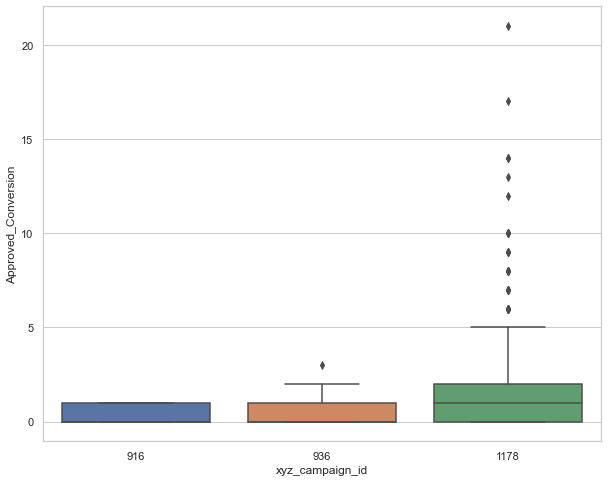

In [27]:
#แคมเปญ 1178 ดึงดูดลูกค้าให้มาซื้อสินค้าได้สูงที่สุด
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='xyz_campaign_id',y='Approved_Conversion', data=df1, orient="v")

In [31]:
#count campaign
campaign = df1['xyz_campaign_id'].value_counts()
campaign

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

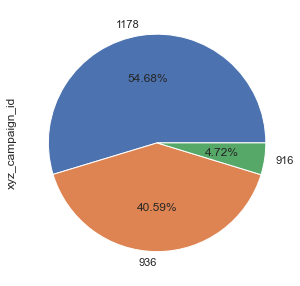

In [32]:
campaign = df1['xyz_campaign_id'].value_counts()
campaign.nlargest(5).plot.pie(autopct='%.2f%%',figsize=(5,5))

In [33]:
#cost per acquisition = total cost / total customer who buy product
df1 = df1.groupby(['xyz_campaign_id']).sum().reset_index()
df1['CPA'] = (df1['Spent']/df1['Approved_Conversion'])
df1

,xyz_campaign_id,Approved_Conversion,Spent,CPA
0,916,24,149.710001,6.237917
1,936,183,2893.369999,15.810765
2,1178,872,55662.149959,63.832741


สรุปผล บริษัท XYZ company มีแคมเปญทั้งหมด 3 แคมเปญ คือ แคมเปญไอดี 916, 936 และ 1178 โดย แคมเปญที่ดึงดูดลูกค้าได้มากที่สุดคือ แคมเปญไอดี 1178
จำนวนลูกค้าที่เข้ามาชมโฆษณาคือ 625 คน คิดเป็น 54.68% จากจำนวนลูกค้าทั้งหมด ราคาค่าแคมเปญทั้งหมดคือ 55662.2 บาท อย่างไรก็ตาม เมื่อเทียบค่า CPA แล้ว แคมเปญนี้เป็นแคมเปญที่มีค่า CPA สูงสุด 
หรือ ความหมาย คือ บริษัทจ่ายเงินโฆษณามากที่สุดเพื่อให้ได้ลูกค้าที่เข้ามาซื้อสินค้า 1 คน(จ่ายเงินค่าโฆษณา 63.83 บาทต่อลูกค้า 1 คน) เมื่อเทียบกับ แคมเปญ 916 ที่ถึงแม้จะดึงดูดลูกค้าได้น้อยแต่ CPA มีค่าค่อนข้างดี หรือก็คือบริษัทจ่ายเงินเพียง 6.24 บาทเพื่อให้ได้ลูกค้าที่เข้ามาซื้อสินค้า 1 คน

#### 2. By assuming that everyone saw the ad that was shown, find the click-through rate for eachad campaign of XYZ company. Explain the result(s).

In [34]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [35]:
df2 = data[['xyz_campaign_id','Impressions','Clicks']]
df2.head()

,xyz_campaign_id,Impressions,Clicks
0,916,7350,1
1,916,17861,2
2,916,693,0
3,916,4259,1
4,916,4133,1


In [36]:
#Click-through-rate (%CTR) = (Clicks/imprssions)*100
df2 = df2.groupby(['xyz_campaign_id']).sum().reset_index()
df2['CTR'] = (df2['Clicks']/df2['Impressions'])*100
df2

,xyz_campaign_id,Impressions,Clicks,CTR
0,916,482925,113,0.023399
1,936,8128187,1984,0.024409
2,1178,204823716,36068,0.017609


สรุปผล %CTR ที่สูงเป็นตัวบ่งชี้ว่าลูกค้าให้ความสนใจกับโฆษณาที่แสดงผลเป็นอย่างดี ลูกค้ามีแนวโน้จะคลิกเข้าดูผลิตภัณฑ์หลังจากรับชมโฆษณา เมื่อพิจารณาจากผลลัพธ์ในตาราง แคมเปญ 916 มี CTR = 0.023% , แคมเปญ 936 มี CTR = 0.024% และ แคมเปญ 1178 มี CTR = 0.017% แสดงว่า แคมเปญ 936 ได้รับผลตอบรับจากลูกค้าดีที่สุด

#### 3) By defining leads as people who enquired about the product after seeing the ad, find the conversion rate for each ad campaign of XYZ company. Explain the result(s).

In [37]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [38]:
df3 = data[['xyz_campaign_id','Approved_Conversion','Total_Conversion']]
df3.head()

,xyz_campaign_id,Approved_Conversion,Total_Conversion
0,916,1,2
1,916,0,2
2,916,0,1
3,916,0,1
4,916,1,1


In [39]:
#CVR (%CVR) = (Total_Conversion/Impressions)*100
df3 = df3.groupby(['xyz_campaign_id']).sum().reset_index()
df3['CVR'] = (df3['Approved_Conversion']/df3['Total_Conversion'])*100
df3

,xyz_campaign_id,Approved_Conversion,Total_Conversion,CVR
0,916,24,58,41.379310
1,936,183,537,34.078212
2,1178,872,2669,32.671413


สรุปผล CVR คือสัดส่วนระหว่างจำนวนคนที่ซื้อสินค้าต่อจำนวนคนที่ติดต่อเข้า ยิ่งค่า CVR สูงหมายความว่า โฆษณาส่งผลดีทำให้ลูกเกิดความต้องการอยากได้สินค้า จากตาราง แคมเปญ 916 มี CVR = 41.4% หรือแปลความหมายโดยง่ายว่า จากลูกค้าติดต่อเข้ามา 100 คน ซื้อสินค้า 41 คน ส่วนแคมเปญ 936 มี CVR = 34.1% (จากลูกค้า 100 คน จะมี 34 คนซื้อสินค้า) และ แคมเปญ 1178 มี CVR = 32.7%% (จากลูกค้า 100 คน จะมี 32 คนซื้อสินค้า)

4) Explore the dataset and report the results that is interesting to you. Explain the result(s).

In [40]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [41]:
display(df1,df2,df3)

,xyz_campaign_id,Approved_Conversion,Spent,CPA
0,916,24,149.710001,6.237917
1,936,183,2893.369999,15.810765
2,1178,872,55662.149959,63.832741


,xyz_campaign_id,Impressions,Clicks,CTR
0,916,482925,113,0.023399
1,936,8128187,1984,0.024409
2,1178,204823716,36068,0.017609


,xyz_campaign_id,Approved_Conversion,Total_Conversion,CVR
0,916,24,58,41.379310
1,936,183,537,34.078212
2,1178,872,2669,32.671413


In [42]:
data['%CTR'] = (data['Clicks']/data['Impressions'])*100
data['%CVR']=(data['Approved_Conversion']/data['Total_Conversion'])*100
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,%CTR,%CVR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,50.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,100.0


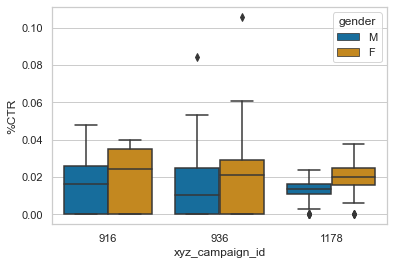

In [43]:
sns.boxplot(y='%CTR', x='xyz_campaign_id', 
                 data=data, 
                 palette="colorblind",
                 hue='gender')

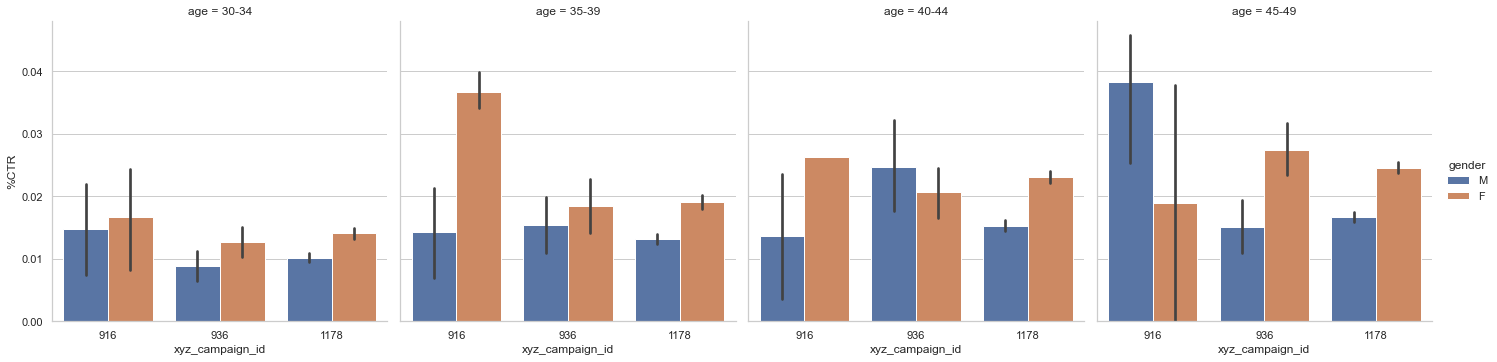

In [44]:
sns.catplot(y="%CTR",x="xyz_campaign_id",
            data = data, hue="gender", col="age",
            kind="bar",col_wrap=4)

สรุปผล เกือบทุกแคมเปญของบริษัท เพศหญิงมี CTR ที่สูงกว่าเพศชายในเกือบทุกกลุ่มช่วงอายุเป็นตัวบ่งชี้ที่ดีว่าโฆษณาของบริษัทดึงดูดเพศหญิงได้มากกว่า ยกเว้นแคมเปญ 916 ในช่วงอายุ 45-49 ที่เพศชายมี %CTR สูงกว่าเพศหญิงอย่างเห็นได้ชัด อย่างไรก็ตามยังไม่สามารถชี้ชัดได้ว่าสินค้าในแต่ละแคมเปญคนซื้อส่วนใหญ่จะเป็นผู้หญิงหรือไม่ ต้องพิจารณาเงื่อนไขต่อไป

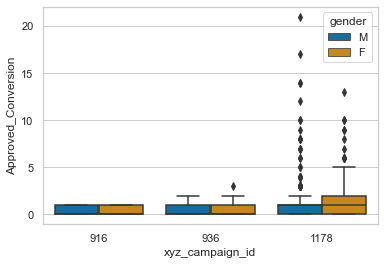

In [48]:
sns.boxplot(y='Approved_Conversion', x='xyz_campaign_id', 
                 data=data, 
                 palette="colorblind",
                 hue='gender')

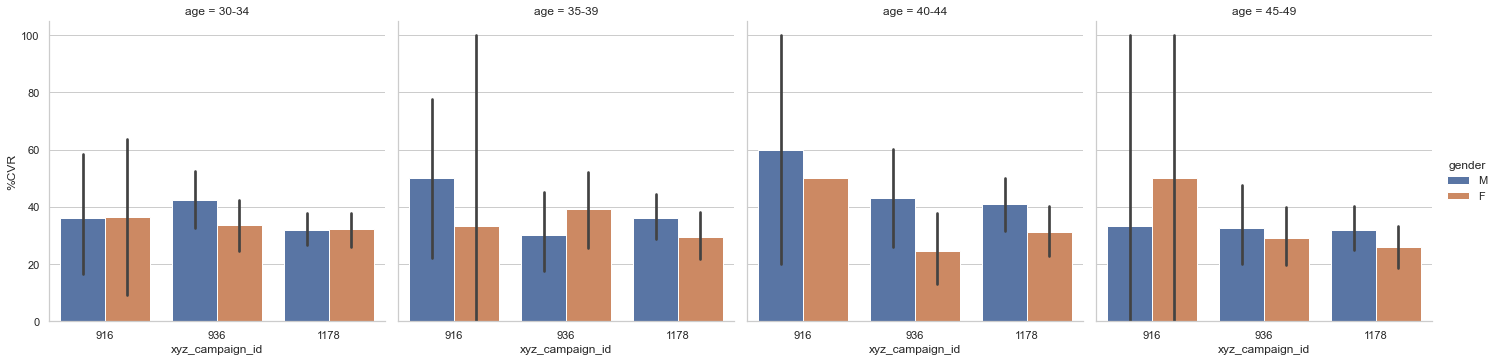

In [49]:
sns.catplot(y="%CVR",x="xyz_campaign_id",
            data = data, hue="gender", col="age",
            kind="bar",col_wrap=4)

สรุปผล ถึงแม้กลุ่มลูกค้าที่มี %CTR สูงจะเป็นกลุ่มผู้หญิง แต่จากกราฟ กลุ่มลูกค้าผู้ชายกลับเป็นกลุ่มที่มีเปอร์เซ็นต์ในการซื้อสินค้าสูงกว่า ยกเว้นแค่แคมเปญ 936 ในกลุ่มอายุ 35-39 และ แคมเปญ 916 ในกลุ่ม 45-49 ซึ่งพอสรุปได้ว่า สินค้าของบริษัท xyz company เป็นที่ต้องการและตอบโจทย์กลุ่มลูกค้าผู้ชายมากกว่า ซึ่งอาจจะนำไปสู่แคมเปญใหม่โดยใช้วิธีการทำแคมเปญแบบ 916 มาพัฒนาเพราะใช้งบในการจ่ายโฆษณาเพื่อให้ได้ลูกค้าที่ซื้อสินค้า 1 คนน้อยที่สุด พร้อมทั้งออกโปรโมชั่นที่เหมาะสมเพื่อดึงดูดกลุ่มลูกค้าที่ตรงกับสินค้าได้ดียิ่งขึ้น